### import ライブラリ

In [1]:
import random
import numpy as np
from scipy.special import comb
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# K-meansスクラッチ

K-meansのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchKMeansクラスにコードを書き加えていってください。

### 《雛形》

In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pass
        return

## クラスタリングのための人工データセット
クラスタリングを実験するための人工データセットを作成するコードを用意しています。


このmake_blobs関数は正解ラベルも出力してますが、今回は使用しません。使用しないことを明示するために、 _（**アンダースコア**） で受け取っています。

### 《シンプルデータセット3》

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [4]:
X.shape, type(X)

((100, 2), numpy.ndarray)

## 学習
K-meansの学習に必要な要素を順番に作成していきます。

## 【問題1】中心点の初期値を決める
入力されたデータから 
$K$個の中心点 
$μ_{1}$から$μ_{K}$の初期値を決めるコードを作成してください。
$K$は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 
$X_{n}$の中からランダムに $K$個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $μ$の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

### 【問題1】解答

In [5]:
# k = 4

In [6]:
# def set_mu(X, k):
#     mu_idx = random.sample(range(len(X)), k)
#     mu = X[mu_idx]
#     return mu

# np.sqrt((X[:,0] - mu[0,0])**2+(X[:,1] - mu[0,1])**2) == np.linalg.norm(X - mu[0], axis=1)

## 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。


K-meansはこのSSEを最小化する 
$r_{nk}$と $μ_{k}$を求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

$$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$: データ点のインデックス


$k$: クラスタのインデックス


$X_{n}$: $n$番目のデータ点


$μ_{k}$: $k$番目の中心点


$r_{nk}$: データ点$X_{n}$がクラスタ$k$に所属していたら1、そうでなければ0

### 【問題2】解答

In [7]:
def sse_func(X, mu):
    sse_list = np.zeros(k)
    for i in range(k):
        sse_list[i] = sum(np.linalg.norm(X_assigned[X_assigned[:,-1]== i][:, :-1] - mu[i], ord=2, axis=1))
    return sum(sse_list)

## クラスタの割り当てと中心点の移動を繰り返す
K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


* 中心点 $μ_{k}$を固定した上で SSE を最小化する クラスタの割り当て $r_{nk}$を選ぶ。
* クラスタの割り当て $r_{nk}$ を固定した上で SSEを最小化する 中心点 $μ_{k}$を選ぶ。

最初の中心点 $μ_{k}$は問題1で作成した初期値です。


順番に見ていきます。

## 【問題3】クラスタへの割り当て
全てのデータ点 $X_{n}$ を最も近い中心点 $μ_{k}$に割り当てるコードを作成してください。


K-menasにおける **近い** とは点と点のユークリッド距離が小さくなることです。ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$に対しては以下の数式で表現できます。
 
$$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数が`np.linalg.norm`として用意されているため使用してください。


[numpy.linalg.norm — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html)


中心点 $μ_{k}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

### 【問題3】解答

In [8]:
# mu = set_mu(X, k)
# comparison_list = np.zeros((len(X),k))

# def assign_to_cluster(X, mu):
#     for i in range(k):
#         comparison_list[:,i] = np.linalg.norm(X - mu[i], ord=2, axis=1)
# #         comparison_list[:,i] = X@mu[i]
# #         print('hello', comparison_list)
#     assigned_list = np.argmin(comparison_list, axis=1).reshape(-1, 1)
#     X_assigned = np.hstack([X, assigned_list]) # クラスタリングされたラベルをXに結合
#     return X_assigned


# np.linalg.norm(X - mu[0], axis=1), np.sqrt((X[:,0]-mu[0,0])**2+(X[:,1]-mu[0,1])**2)
# sum(np.linalg.norm(X - mu[0], axis=1)), np.linalg.norm(X - mu[0])

## 【問題4】中心点の移動
中心点 
$μ_{k}$を $k$ 番目のクラスタに割り当てられる全てのデータ点 
$X_{n}$の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $_{rnk}$を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

### 【問題4】解答

In [9]:
def move_mu(X_assigned):
    mu_fixed = np.array([])
    for i in range(k):
        mu_fixed = np.append(mu_fixed, np.average(X_assigned[X_assigned[:,-1]== i], axis=0)[0:-1])
    mu = mu_fixed.reshape(k, -1)
    return mu

## 【問題5】繰り返し
クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


* 繰り返しが指定した回数に到達する。（雛形では引数max_iter）
* 中心点 $μ_{k}$と重心の差が指定した許容値以下になる。（雛形では引数tol）

### 【問題5】解答

In [10]:
# max_iter = 10
# tol = 0.0001

In [11]:
def repeat_func(X, max_iter, tol): # 最適化されたmuを返す関数
    global mu
    for _ in range(max_iter):
        X_assigned = assign_to_cluster(X, mu) # クラスタへ割り当て後、割り当てたクラスタの値の列を結合
        mu_fixed = move_mu(X_assigned) # 各中心点を各クラスタに属した𝑋𝑛 の平均値（重心）に移動し、muを更新
        if np.linalg.norm(np.array(mu) - np.array(mu_fixed)) <= tol:
            break
        else:
            mu = move_mu(X_assigned) 
    return mu

## 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 
$μ_{k}$を保持しておきます。

### 【問題6】解答

In [12]:
# n_init = 5
# k = 4
# sse_list = np.array([])
# for n in range(n_init):
#     mu = set_mu(X, k)
#     mu = repeat_func(X, max_iter, tol) # 最適化されたmuを返す関数
#     sse_list = np.append(sse_list, sse_func(X, mu))# SSEを保管
# min(sse_list)

## 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。


* データ点 $X_{n}$と学習で決まった中心点 $μ_{k}$に対し、 SSEを最小化する $r_{nk}$を選ぶ。

具体的には次のことです。


* データ点 $X_{n}$を最も近い $μ_{k}$に割り当てる。

### 【問題7】解答

In [13]:
# n_init = 3
# k = 4
# mu_list = np.array([])
# sse_list = np.array([])
# for n in range(n_init):
#     mu = set_mu(X, k)
#     mu = repeat_func(X, max_iter, tol) # 最適化されたmuを返す関数
#     mu_list = np.append(mu_list, mu)
#     sse_list = np.append(sse_list, sse_func(X, mu))# SSEを保管

# mu_list = mu_list.reshape(-1, k, X.shape[1])
# optimized_idx = np.argmin(sse_list)
# sse_list[optimized_idx]
# # mu_optimized = mu_list[optimized_idx]
# # assign_to_cluster(X, mu_optimized)[:, -1]
# mu_list

#### モデル構築

In [80]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, seed=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.k = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.seed = seed
        
    def set_mu(self, X, k): # muの初期設定
        if self.seed:
            random.seed(self.seed)
        self.mu_idx = random.sample(range(len(X)), self.k)
        self.mu = X[self.mu_idx]
        return self.mu      

        
    def sse_func(self, X, mu):
        self.comparison_list = np.empty((len(X),self.k))
        for i in range(self.k):
            self.comparison_list[:,i] = np.linalg.norm(X - self.mu[i], ord=2, axis=1)
        self.sse = np.sum(np.nanmin(self.comparison_list, axis=1))
        return self.sse

    def assign_to_cluster(self, X, mu): # 一番距離の近い中心点(mu)のインデックスリストと結合したXを返す
        self.comparison_list = np.empty((len(X),self.k))
        for i in range(self.k):
            self.comparison_list[:,i] = np.linalg.norm(X - self.mu[i], axis=1)
            self.min_list = np.sum(np.min(self.comparison_list, axis= 1))
        self.assigned_list = np.nanargmin(self.comparison_list, axis=1).reshape(-1, 1)
        self.X_assigned = np.hstack([X, self.assigned_list]) # クラスタリングされたラベルをXに結合
        return self.X_assigned

    def select_cluster(self, X, mu): # 一番距離の近い中心点(mu)のインデックスリストと結合したXを返す
        self.min_list = np.empty((len(X),self.k))
        for i in range(self.k):     
            self.min_list[:,i] = np.linalg.norm(X - self.mu[i], ord=2, axis=1)
        self.min_list = np.nanargmin(self.min_list, axis= 1)
#         import pdb;pdb.set_trace()
        return self.min_list
        
    def move_mu(self, X_assigned):
        self.mu_moved = np.empty((self.k, X_assigned.shape[1]-1))
        for i in range(self.k):
            self.mu_moved[i] = np.average(X_assigned[X_assigned[:,-1]== i], axis=0)[0:-1]
        return self.mu_moved        
        
        
 # クラスタリングと重心移動を繰り返すし、muを更新する。        
    def repeat_func(self, X, max_iter, tol):
        for _ in range(max_iter):
            self.X_assigned = self.assign_to_cluster(X, self.mu) # 一番距離の近い中心点(mu)のインデックスリストと結合したXを返す
            self.mu_fixed = self.move_mu(self.X_assigned) # 各中心点を各クラスタに属した𝑋𝑛 の平均値（重心）に移動し、muを更新
            if sum(np.linalg.norm(self.mu - self.mu_fixed, ord=2, axis=1)) <= self.tol:
                break
            else:
                self.mu = self.mu_fixed 
#         return self.mu      
        
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        self.mu_list = np.empty((self.n_init, self.k, X.shape[1]))
        self.sse_list = np.empty(self.n_init)
#         self.cluster_list = np.empty((len(X), self.n_init))
        for i in range(self.n_init): # muを初期化して繰り返す
            self.mu = self.set_mu(X, self.k) # muの初期設定
            self.repeat_func(X, self.max_iter, self.tol) # クラスタリングと重心移動を繰り返すし、muを更新する。
#             self.cluster_list[:, i] = self.select_cluster(X, self.mu)
            self.mu_list[i, :, :] = self.mu # n_init回数分のmuを格納
            self.sse_list[i] = self.sse_func(X, self.mu) # n_init回数分のSSEを保管
            for j in range(self.k):
                plt.scatter(X[self.X_assigned[:,-1] == j][:, 0], X[self.X_assigned[:,-1] == j][:, 1])
                plt.show()
            plt.scatter(self.mu[:,0], self.mu[:,1], color='purple')
        self.sse_optimized = np.nanmin(self.sse_list) # 最小のsseを格納
        self.optimized_idx = np.nanargmin(self.sse_list) # 最小のsseのidxを格納
        self.mu_optimized = self.mu_list[self.optimized_idx] # 最適化されたmuを格納
#         self.cluster_optimized_list = self.select_cluster(X, self.mu_optimized) # 最終的なクラスタリング結果を格納
        self.clst_list = self.assign_to_cluster(X, self.mu_optimized)
    
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()        
        
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        
        return self.assign_to_cluster(X, self.mu_optimized)[:, -1]

## 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 $k$
 は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
$k$
 を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 
$k$
 を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

### 【問題8】解答

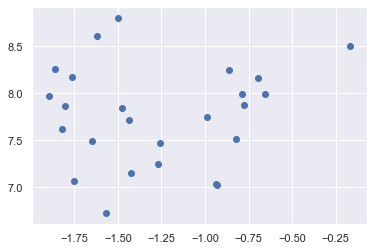

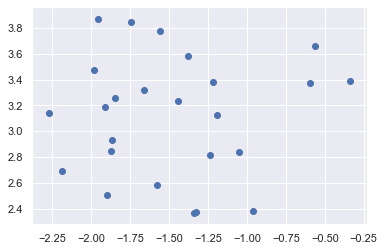

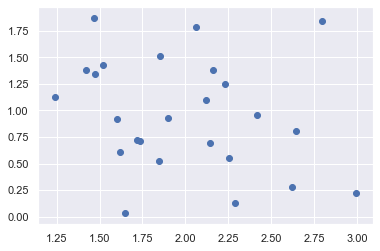

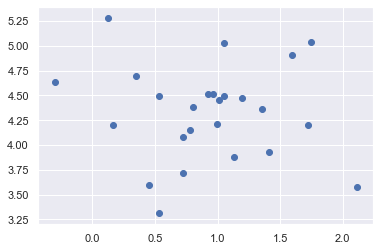

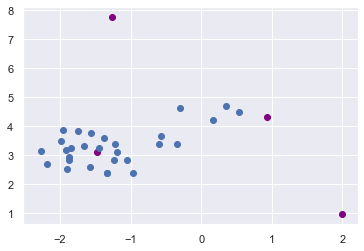

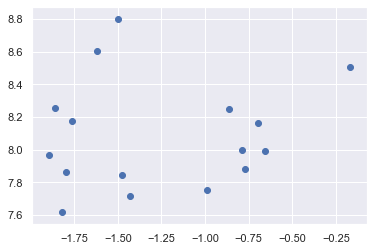

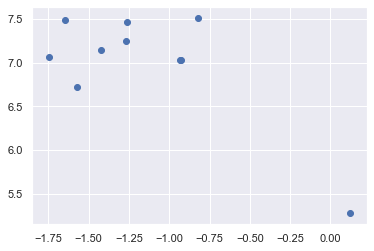

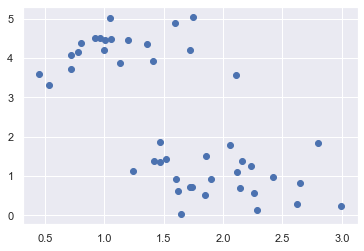

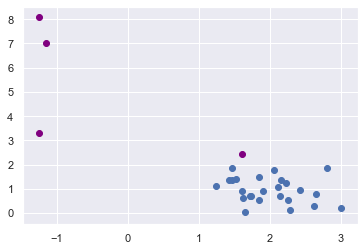

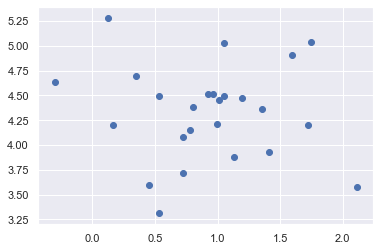

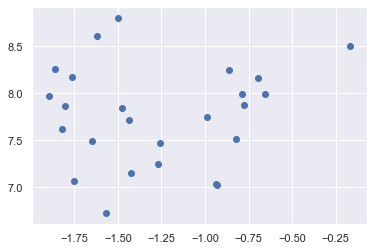

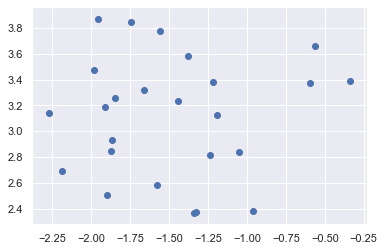

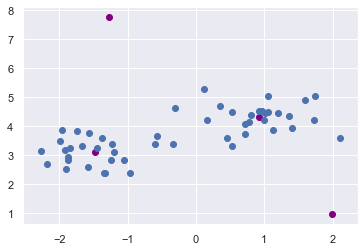

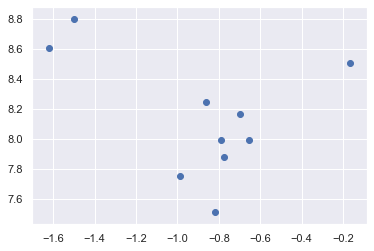

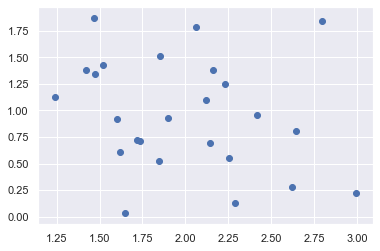

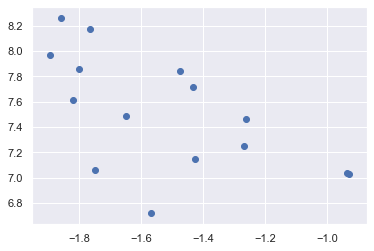

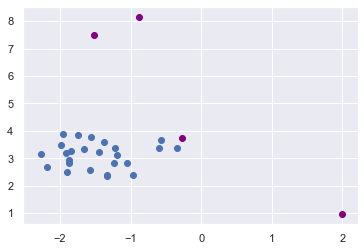

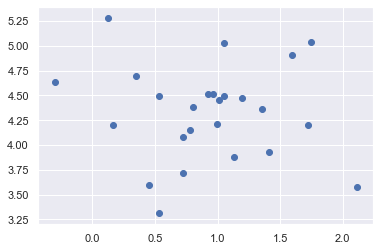

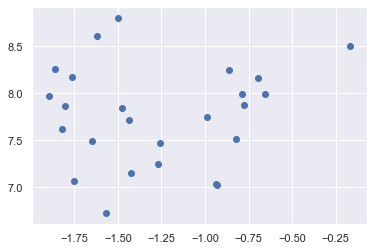

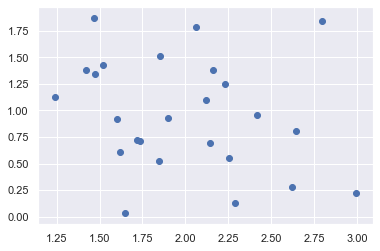

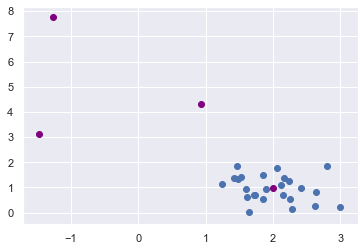

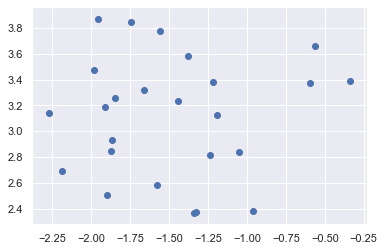

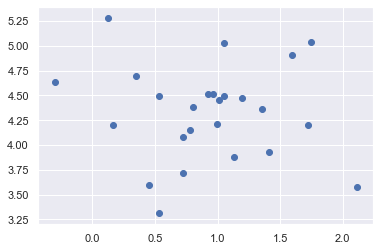

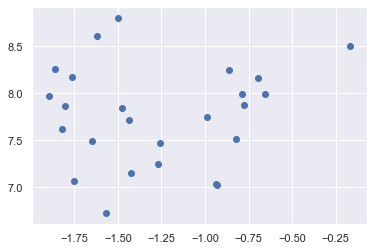

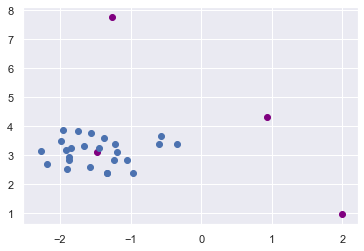

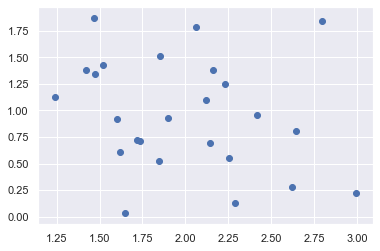

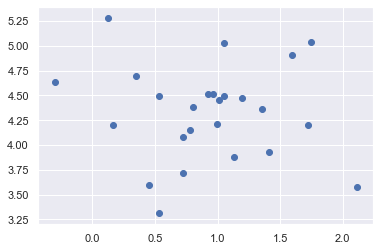

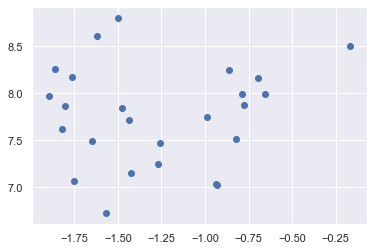

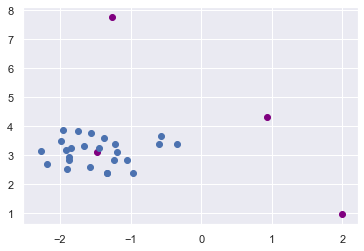

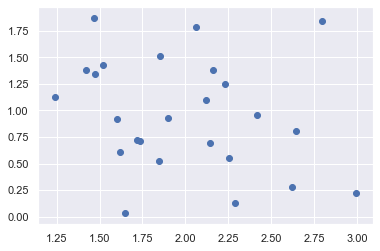

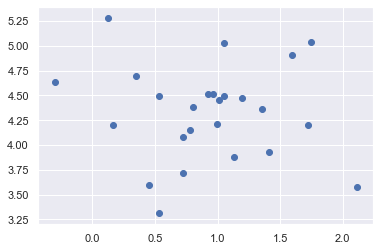

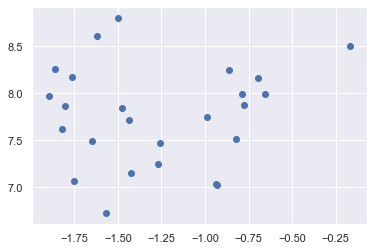

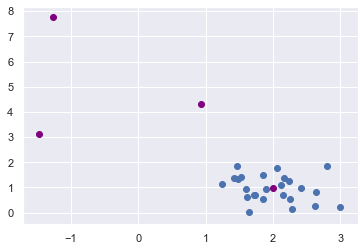

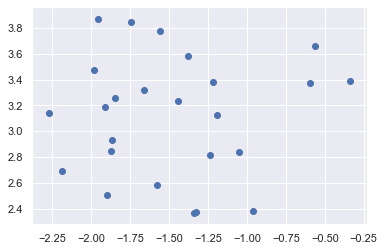

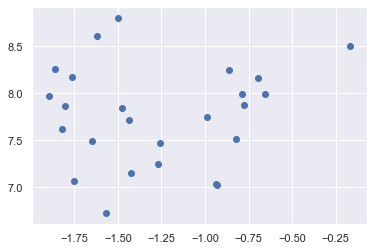

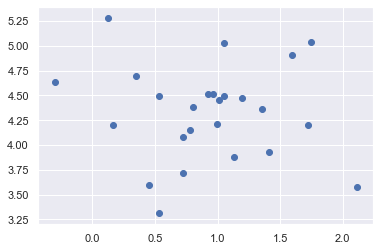

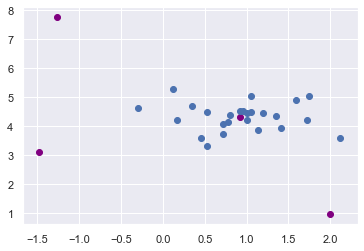

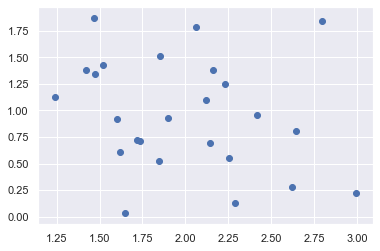

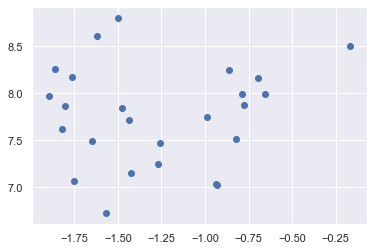

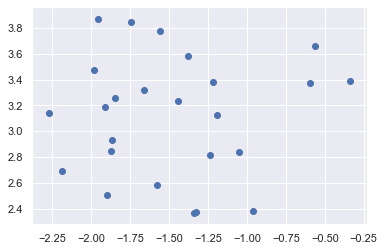

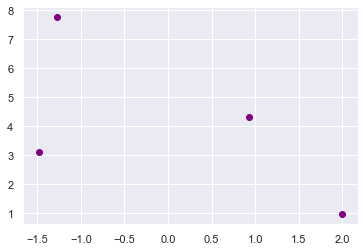

In [81]:
# self, n_clusters, n_init, max_iter, tol, verbose=False
param = {'n_clusters':4, 'n_init':10, 'max_iter':10, 'tol':0.001}
model = ScratchKMeans(**param)
model.fit(X)

# for i in range(model.k):
#     plt.scatter(X[model.clst_list[:,-1] == i][:, 0], X[model.clst_list[:,-1] == i][:, 1])
#plt.scatter(model.mu_optimized[:,0], model.mu_optimized[:,1], color='purple')

# plt.scatter(X[model.clst_list[:,-1] == 0][:, 0], X[model.clst_list[:,-1] == 0][:, 1],color='black')
# plt.scatter(X[model.clst_list[:,-1] == 1][:, 0], X[model.clst_list[:,-1] == 1][:, 1],color='white')



[[0.75405495]
 [4.37807636]
 [1.35306667]
 [1.10682338]
 [1.77265277]
 [0.74816364]
 [2.00726631]
 [3.92224565]
 [1.23896878]
 [3.95819038]
 [3.13807089]
 [3.51130016]
 [3.46587139]
 [3.84707191]
 [3.57275941]
 [4.82835258]
 [2.59950199]
 [0.75420053]
 [2.20570501]
 [4.56354158]
 [2.12049116]
 [4.03087642]
 [2.13337388]
 [4.51179977]
 [0.66533847]
 [2.17762393]
 [0.71946075]
 [0.83202135]
 [3.5253367 ]
 [4.15175237]
 [3.72369075]
 [3.14746294]
 [3.95121864]
 [3.02403025]
 [1.42631216]
 [1.10283769]
 [5.00038523]
 [3.11465546]
 [4.46579579]
 [2.4772257 ]
 [1.40991378]
 [1.69129411]
 [3.12855996]
 [2.10355948]
 [2.26126089]
 [4.62471812]
 [3.77946666]
 [2.04477837]
 [0.68019214]
 [0.87864661]
 [0.71872352]
 [3.62828623]
 [1.77539687]
 [1.79821775]
 [1.94531142]
 [3.66317493]
 [4.30066064]
 [3.89126728]
 [3.54889581]
 [4.01207073]
 [3.43459066]
 [3.00602145]
 [3.60259146]
 [1.97019867]
 [2.99592087]
 [4.18635823]
 [2.60755698]
 [2.16210622]
 [3.39704759]
 [1.23229494]
 [4.51151888]
 [3.05

 [4.36619877 0.97912265 3.17226365]]
[[4.52673273 4.53310553 0.94241008]
 [1.17655506 0.48690326 5.68584835]
 [4.19063663 4.37140344 1.79163323]
 [3.93421259 4.07763546 1.78525555]
 [3.86626364 4.15434294 2.37841639]
 [4.13475306 4.19112467 1.38374419]
 [4.31399303 3.80174885 2.66166898]
 [0.13739775 0.78719211 5.22906018]
 [2.85305313 2.88850993 2.50216004]
 [0.77058263 0.11448397 5.27227786]
 [1.0004074  0.86402935 4.45281289]
 [1.39565284 0.62755838 4.80785416]
 [0.93265019 0.47536605 4.77973617]
 [0.37023931 0.54914767 5.15982901]
 [0.50548384 0.72060726 4.88344662]
 [8.62297494 8.69559786 3.60377531]
 [6.51397714 6.51066453 1.35986126]
 [4.63097906 4.42349575 1.00455216]
 [5.19914351 4.72842673 2.34717705]
 [8.41753941 8.45883271 3.31136341]
 [5.25551886 5.46147263 1.80602124]
 [1.16975725 0.29722497 5.33586933]
 [4.96325477 4.47925724 2.42208773]
 [8.43011598 8.43281396 3.22739012]
 [3.72309099 3.76362485 1.6954373 ]
 [5.48647959 5.06426977 2.06691871]
 [4.34976756 4.10612949 1.3

[[2.37523899 3.02757037 0.56150477 4.51232571]
 [4.8980554  8.00952895 4.59418829 0.65931349]
 [3.19451892 3.45783512 0.5420915  4.29469519]
 [2.97809946 3.64988042 0.32337458 4.01122399]
 [3.6484536  3.95966815 0.99907698 4.04347571]
 [2.5837953  3.40873075 0.12011747 4.15281223]
 [0.88145783 4.90408662 2.80892614 3.95147123]
 [4.86292642 7.44618872 3.95108725 0.50786889]
 [2.77331854 4.70095778 1.23232712 2.84760567]
 [4.63598431 7.56923602 4.12278529 0.17158362]
 [3.99687807 6.72807303 3.27042468 0.81143441]
 [3.98533927 7.1532093  3.80038849 0.84948708]
 [4.18047793 7.08077606 3.6457309  0.51236944]
 [4.70407483 7.40912078 3.92653404 0.28185258]
 [4.49106289 7.12278391 3.63709413 0.5151549 ]
 [5.38642187 1.24911132 4.5887902  8.66264759]
 [3.27052422 1.04435102 2.48124048 6.49869775]
 [1.27145563 3.36067224 1.45254816 4.47202378]
 [0.33024882 4.32920638 2.99969989 4.8666124 ]
 [5.04346467 0.93302326 4.37331339 8.43560087]
 [3.71309908 2.61371686 1.46001903 5.38069615]
 [4.54182988 

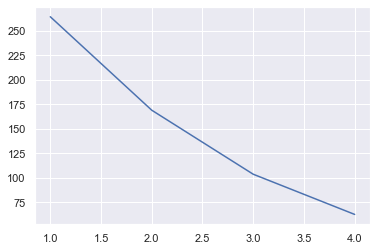

array([[ 1.99186903,  0.96561071],
       [-1.26811733,  7.76378266],
       [-1.47935679,  3.11716896],
       [ 0.92578447,  4.32475792]])

In [50]:
n_clusters = []
sse_by_n_clusters = []
for i in range(4):
    param = {'n_clusters':i+1, 'n_init':50, 'max_iter':100, 'tol':1}
    model = ScratchKMeans(**param)
    model.fit(X)
    n_clusters.append(i+1)
    sse_by_n_clusters.append(model.sse_optimized)

sns.set()
plt.plot(n_clusters, sse_by_n_clusters)
plt.show()

model.mu_moved

# クラスタ分析

## 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


[UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)


Data Folderの中から`Wholesale customers data.csv` をダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。
`Region`と`Channel`は取り覗き、金額のデータでK-meansを利用します。

In [17]:
df = pd.read_csv('../Wholesale customers data.csv')

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
df = df.drop(['Region', 'Channel'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

### 《PCAのサンプルコード》

In [19]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# pca = pca.fit(data)
# data_pca = pca.transform(data)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(df)
data_pca = pca.transform(df)

### 《PCAの分散説明率を表示するコードサンプル》

In [21]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# pca = PCA(n_components=None)
# pca = pca.fit(data)
# var_exp = pca.explained_variance_ratio_
# cum_var_exp = np.cumsum(var_exp)
# print(cum_var_exp)
# plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
# plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal components')
# plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


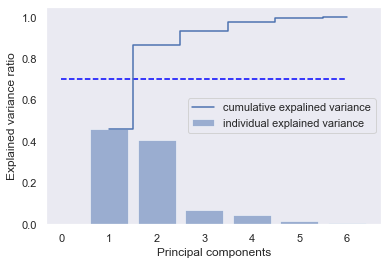

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(df)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

In [23]:
df = df.values

In [24]:
df.shape

(440, 6)

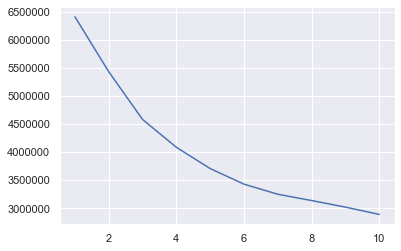

In [25]:
n_clusters = []
sse_by_n_clusters = []
for i in range(10):
    param = {'n_clusters':i+1, 'n_init':20, 'max_iter':20, 'tol':0.01}
    model = ScratchKMeans(**param)
    model.fit(df)
    n_clusters.append(i+1 )
    sse_by_n_clusters.append(model.sse_optimized)

sns.set()
plt.plot(n_clusters, sse_by_n_clusters)

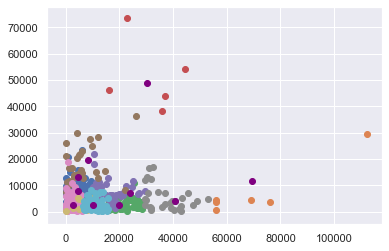

In [26]:
for i in range(model.k):
    plt.scatter(model.X_assigned[model.X_assigned[:,-1]== i][:, 0], model.X_assigned[model.X_assigned[:,-1]== i][:, 1])
plt.scatter(model.mu_optimized[:,0], model.mu_optimized[:,1], color='purple')

## 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

## 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。


**《ヒント》**


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasの`groupby`が便利です。


[pandas.DataFrame.groupby — pandas 0.23.4 documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)